In [1]:
from rdkit import Chem
import molhighlighter as mh

- Simple substructure highlight based on SMARTS

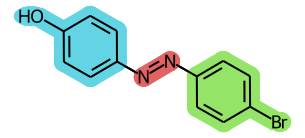

In [2]:
mol = Chem.MolFromSmiles("C1=CC(=CC=C1N=NC2=CC=C(C=C2)Br)O")
highlights = [
    mh.Highlight.from_smarts(mol, "c1ccccc1Br", fill_ring=True),
    mh.Highlight.from_smarts(mol, "N=N"),
    mh.Highlight.from_smarts(mol, "c1ccccc1O", fill_ring=True),
]
mh.MolHighlighter(mol, highlights).display()

- Manual substructure highlight using atom indices

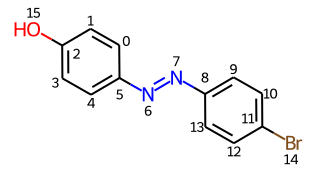

Click on the square to pick a color for the highlight


ColorPicker(value='#e36262')

In [3]:
# alias for PairedMolHighlighter
molh = mh.MolHighlighter(mol)
# display annotated structure
molh.hint()

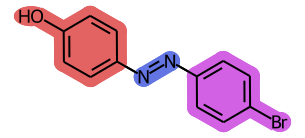

In [4]:
# manually specify indices and colors
highlights = [
    mh.Highlight([8, 9, 10, 11, 12, 13, 14], color="#d262e3", fill_ring=True),
    mh.Highlight([6, 7], color="#6275e3"),
    mh.Highlight([0, 1, 2, 3, 4, 5, 15], color="#e36262", fill_ring=True),
]
molh.highlights = highlights
molh.display()

- Paired highlight

In [5]:
name = "4-[(4-bromophenyl)diazenyl]phenol"
highlights = [
    mh.PairedHighlight("4-bromophenyl", [8, 9, 10, 11, 12, 13, 14], fill_ring=True),
    mh.PairedHighlight("diazenyl", [6, 7]),
    mh.PairedHighlight("phenol", [0, 1, 2, 3, 4, 5, 15], fill_ring=True),
]
molh = mh.PairedMolHighlighter(name, mol, highlights)
# set white background (transparent by default)
molh.configure(style="background-color: white; color: black")
molh.display()

4-[( 4-bromophenyl ) diazenyl ] phenol 
 <?xml version='1.0' encoding='iso-8859-1'?>
 
<!-- END OF HEADER -->
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path class='atom-14' d='M 278.6 121.6
Q 279.9 121.9, 280.5 122.7
Q 281.2 123.4, 281.2 124.6
Q 281.2 126.4, 280.0 127.4
Q 278.9 128.4, 276.7 128.4
L 272.3 128.4
L 272.3 115.4
L 276.1 115.4
Q 278.4 115.4, 279.5 116.3
Q 280.6 117.2, 280.6 118.8
Q 280.6 120.8, 278.6 121.6
M 274.1 116.8
L 274.1 120.9
L 276.1 120.9
Q 277.4 120.9, 278.1 120.4
Q 278.8 119.9, 278.8 118.8
Q 278.8 116.8, 276.1 116.8
L 274.1 116.8
M 276.7 126.9
Q 278.0 126.9, 278.6 126.3
Q 279.3 125.7, 279.3 124.6
Q 279.3 123.5, 278.6 123.0
Q 277.8 122.4, 276.4 122.4
L 274.1 122.4
L 274.1 126.9
L 276.7 126.9
' fill='#000000'/>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path class='atom-14' d='M 278.6 121.6
Q 279.9 121.9, 280.5 122.7
Q 281.2 123.4, 281.2 124.6
Q 281.2 126.4, 280.0 127.4
Q 278.9 128.4, 276.7 128.4
L 272.3 128.4
L 272.3 115.4
L 276.1 115.4
Q 278.4 115.4, 279.5 116.3
Q 280.6 117.2, 280.6 118.8
Q 280.6 120.8, 278.6 121.6
M 274.1 116.8
L 274.1 120.9
L 276.1 120.9
Q 277.4 120.9, 278.1 120.4
Q 278.8 119.9, 278.8 118.8
Q 278.8 116.8, 276.1 116.8
L 274.1 116.8
M 276.7 126.9
Q 278.0 126.9, 278.6 126.3
Q 279.3 125.7, 279.3 124.6
Q 279.3 123.5, 278.6 123.0
Q 277.8 122.4, 276.4 122.4
L 274.1 122.4
L 274.1 126.9
L 276.7 126.9
' fill='#000000'/>

In [6]:
mol = Chem.MolFromSmiles("COC1=CC(O)=CC(Br)=C1")
name = "3-bromo-5-methoxyphenol"
highlights = [
    mh.PairedHighlight.from_smarts(mol, "Br", "3-bromo"),
    mh.PairedHighlight.from_smarts(mol, "CO", "5-methoxy"),
    mh.PairedHighlight.from_smarts(mol, "c1ccccc1O", "phenol", fill_ring=True),
]
# alias for PairedMolHighlighter
molh = mh.PMH(name, mol, highlights)
# highlight using the font-color rather than the background-color
molh.configure(label_style="color:")
molh.display()

3-bromo - 5-methoxy phenol 
 <?xml version='1.0' encoding='iso-8859-1'?>
 
<!-- END OF HEADER -->

In [7]:
smiles = "COC1=C(C=C(C(=N1)OC(F)(Cl)F)NC(=O)OC)Br"
mol = Chem.MolFromSmiles(smiles)

highlights = [
    mh.PairedHighlight(atom.GetSymbol(), [atom.GetIdx()])
    for atom in mol.GetAtoms()
]
molh = mh.PMH(smiles, mol, highlights)
molh.configure(style="background-color: white; color: black", label_style="color:")
molh.display()

C O C 1= C ( C = C ( C (= N 1) O C ( F )( Cl ) F ) N C (= O ) O C ) Br 
 <?xml version='1.0' encoding='iso-8859-1'?>
 
<!-- END OF HEADER -->
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
<path class='atom-18' d='M 41.7 135.4
Q 43.0 135.7, 43.6 136.5
Q 44.3 137.2, 44.3 138.4
Q 44.3 140.2, 43.1 141.2
Q 42.0 142.2, 39.8 142.2
L 35.4 142.2
L 35.4 129.2
L 39.2 129.2
Q 41.5 129.2, 42.6 130.1
Q 43.7 131.0, 43.7 132.6
Q 43.7 134.6, 41.7 135.4
M 37.1 130.6
L 37.1 134.7
L 39.2 134.7
Q 40.5 134.7, 41.2 134.2
Q 41.9 133.7, 41.9 132.6
Q 41.9 130.6, 39.2 130.6
L 37.1 130.6
M 39.8 140.7
Q 41.1 140.7, 41.7 140.1
Q 42.4 139.5, 42.4 138.4
Q 42.4 137.3, 41.7 136.8
Q 40.9 136.2, 39.5 136.2
L 37.1 136.2
L 37.1 140.7
L 39.8 140.7
' fill='#000000'/>